In [1]:
%pylab inline
plt.rc('font',size=20)

Populating the interactive namespace from numpy and matplotlib


In [3]:
import networkx as nx

Architecture

In [4]:
n = 9
adj = ones((n,n))
adj[diag_indices(n)] = 0

G = nx.Graph(adj)

In [4]:
n = 9
adj = ones((n,n))
adj[diag_indices(n)] = 0

G = nx.Graph(adj)

In [8]:
# Grid.
G=nx.grid_2d_graph(4,4)  #4x4 grid
pos=nx.spring_layout(G,iterations=500)

In [63]:
# Graph for pseudolikelihood.
n = 9
adj = ones((n,n))
adj[diag_indices(n)] = 0

G = nx.Graph(adj)

cpos = nx.circular_layout(G)
outcpos = {}
for c in cpos:
    outcpos[c+9] = cpos[c]*1.5
cpos.update(outcpos)

for i in xrange(9,18):
    G.add_node(i)
    G.add_edge(i-9,i)

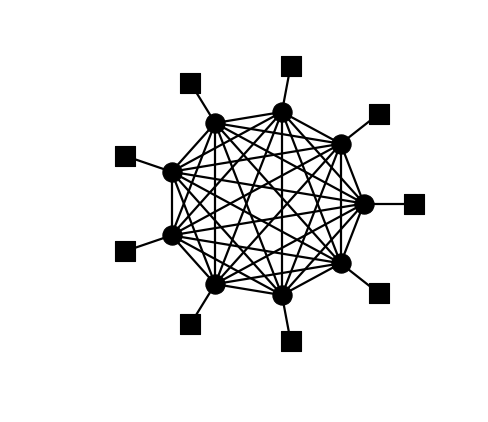

In [64]:
fig,ax = plt.subplots(figsize=(6.4,6))
nx.draw(G,ax=ax,node_color='k',node_shape='o',
        edge_color='k',width=2,pos=cpos)

nx.draw(G.subgraph(range(9,18)),ax=ax,node_color='k',node_shape='s',
        edge_color='k',width=2,pos=outcpos)

In [66]:
fig.savefig('/Users/eddie/Downloads/pseudo.pdf',bbox_inches='tight')

In [110]:
X = random.normal(size=100)

In [111]:
mch_estimate = lambda dL:( X**2*exp(-dL*X**2) ).mean() / exp(-dL*X**2).mean()

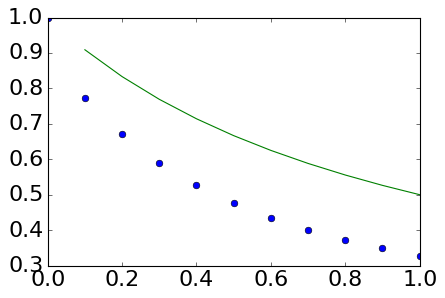

In [119]:
dL = linspace(.1,1,10)

fig,ax = plt.subplots()
ax.plot(dL,[mch_estimate(i) for i in dL],'o')
ax.plot(0,1,'bo')
ax.plot(dL,1/(dL+1))

In [121]:
gauss1 = lambda x: exp(-x**2)
gauss2 = lambda x: exp(-(x-.5)**2/2)

In [147]:
# Numerical sample
r = random.normal(size=100)
p,x = histogram(r)
p = p/p.sum()
xmid = (x[1:]+x[:-1])/2

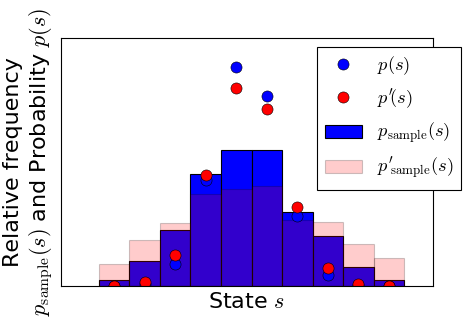

In [187]:
fig,ax = plt.subplots()
ax.bar( x[:-1],p,width=x[1]-x[0] )

pcont = gauss1(xmid)
pcont = pcont/pcont.sum()
ax.plot(xmid,pcont,'bo',ms=10)

pextrap = p*exp(.2*xmid**2)
pextrap /= pextrap.sum()
ax.bar(x[:-1],pextrap,width=x[1]-x[0],alpha=.2,color='r')

pextrap = gauss1(xmid)*exp(.2*xmid**2)
pextrap /= pextrap.sum()
ax.plot(xmid,pextrap,'o',ms=10,c='r')

ax.set(xlabel=r'State $s$',ylabel='Relative frequency\n'+r'$p_\mathrm{sample}(s)$ and Probability $p(s)$',xticks=[],yticks=[])
ax.legend((r'$p(s)$',r"$p'(s)$",'$p_\mathrm{sample}(s)$',"$p'_\mathrm{sample}(s)$"),
          fontsize='small',bbox_to_anchor=(1.1,1),numpoints=1)

In [188]:
fig.savefig('/Users/eddie/Downloads/mch.pdf',bbox_inches='tight')

In [ ]:
fig,ax = plt.subplots()
ax.plot()

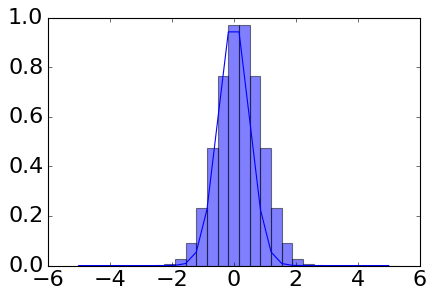

In [133]:
x = linspace(-5,5,30)

fig,ax = plt.subplots()
ax.bar(x,gauss1(x),width=x[1]-x[0],alpha=.5)
# ax.bar(x,gauss2(x),width=x[1]-x[0],color='r',alpha=.5)
ax.plot(x,gauss1(x)*exp(-1*x**2))

# fig.savefig('/Users/eddie/Downloads/mch.pdf',bbox_inches='tight')

In [189]:
g=nx.DiGraph()
g.add_edges_from([(1,2), (1,3), (1,4), (2,5), (2,6), (2,7), (3,8), (3,9),
                  (4,10), (5,11), (5,12), (6,13)])
p=nx.drawing.nx_pydot.to_pydot(g)

ImportError: No module named pydotplus

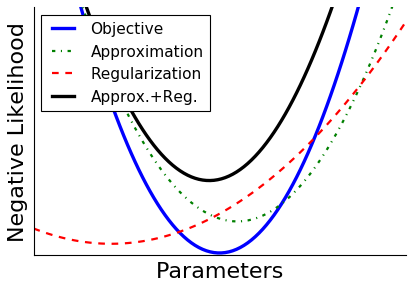

In [226]:
x = linspace(-3,3,100)

ytrue = x**2
yreg = .7*(x-1)**2+x
ycost = (x+2)**2*.2-.1*x

fig,ax = plt.subplots()
ax.plot(x,ytrue,lw=3)
ax.plot(x,yreg,'-.',lw=2)
ax.plot(x,ycost,'r--',lw=2)
ax.plot(x,ycost+yreg,'k',lw=3)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set(ylim=[-.05,5],xlabel='Parameters',ylabel='Negative Likelihood',
       xticks=[],yticks=[])
ax.legend(('Objective','Approximation','Regularization','Approx.+Reg.'),
          fontsize='x-small',loc=2)

In [227]:
fig.savefig('/Users/eddie/Downloads/regmf.pdf',bbox_inches='tight')